In [383]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
QB = pd.read_csv("QBStats_all.csv")
QB = pd.get_dummies(QB, columns = ['home_away'])
QB.head()

,qb,att,cmp,yds,ypa,td,int,lg,sack,loss,rate,game_points,year,home_away_away,home_away_home
0,Kyle RichardsonK. Richardson,1,1,-11.0,-11.0,0,0,0,0.0,0.0,79.2,16,2001,1,0
1,Mark RoyalsM. Royals,1,1,-8.0,-8.0,0,0,0,0.0,0.0,79.2,13,1996,1,0
2,Billy Joe TolliverB. Tolliver,1,1,-8.0,-8.0,0,0,0,0.0,0.0,79.2,25,1997,0,1
3,Shann SchillingerS. Schillinger,1,1,-8.0,-8.0,0,0,0,0.0,0.0,79.2,28,2013,0,1
4,Antwaan Randle ElA. Randle El,1,1,-7.0,-7.0,0,0,0,0.0,0.0,79.2,14,2003,1,0


In [384]:
#function to clean lg
def first2(x):
    x = str(x)
    if (x[-1] =='t'):
        x = x[:-1]
    x = float(x)
    return x 

In [385]:
#clean lg
newlg = QB.lg.apply(first2)
QB['lg'] = newlg

In [386]:
#clean qb
def scrubName(x):
    splitStrings = x.split(".")
    x = splitStrings[0]
    x = x[:-1]
    return x
newqb = QB.qb.apply(scrubName)
QB['qb'] = newqb
QB = QB.sort_values(by = ['qb'])


In [387]:
def scrubint(x):
    if x == "--":
        x = 0
    x = int(x)
    return x
newInt = QB.int.apply(scrubint)
QB['int'] = newInt

In [388]:
QB['rate'].value_counts().head()

39.6     579
0.0      221
118.8    198
158.3    130
56.2      83
Name: rate, dtype: int64

In [389]:
QB['comp_percent'] = (QB['cmp'] / QB['att']) * 100

In [390]:
#Scrub Nulls
compMean = QB['comp_percent'].mean()
rateMean = QB['rate'].mean()
lossMean = QB['loss'].mean()
lgMean = QB['lg'].mean()
sackMean = QB['sack'].mean()

QB['comp_percent'] = QB['comp_percent'].fillna(compMean)
QB['rate'] = QB['rate'].fillna(rateMean)
QB['loss'] = QB['loss'].fillna(lossMean)
QB['lg'] = QB['lg'].fillna(lgMean)
QB['sack'] = QB['sack'].fillna(sackMean)

In [391]:
#Which QB had the worst game (based on QBR)?
sortedQBR = QB.sort_values(by = ['rate'], ascending = True)
print(sortedQBR[['qb','rate', 'year']].head(20))
"Clearly many QBs had a rating of 0. Lets dig a little deeper"
count = QB['rate'].value_counts().head())
print("221 Quarterbacks had a rating of 0")

                      qb  rate  year
576         Tim Castille   0.0  2009
411        Marion Barber   0.0  2005
726         Marc Mariani   0.0  2015
642            Tim Tebow   0.0  2012
627        Charlie Batch   0.0  2011
420         Charlie Frye   0.0  2005
187          Jay Fiedler   0.0  2000
84         Joey Galloway   0.0  1997
596      Leon Washington   0.0  2010
98          Leon Johnson   0.0  1998
786         Tyrod Taylor   0.0  2013
136       Charlie Garner   0.0  1999
1201          Jeff Blake   0.0  1998
82          Leon Johnson   0.0  1997
280         Leon Johnson   0.0  2002
27     Lawrence Phillips   0.0  1996
76            Jeff Brohm   0.0  1997
993   Charlie Whitehurst   0.0  2015
357     Larry Fitzgerald   0.0  2004
513          Lance Moore   0.0  2008


TypeError: 'count' is an invalid keyword argument for print()

In [392]:
#Which QB threw the most picks in one game?
sortedPicks = QB.sort_values(by = ['int'], ascending = False)
print(sortedPicks[['qb','int', 'year']].head(1))

             qb  int  year
4370  Ty Detmer    7  2001


In [393]:
#Which QB took the most sacks in one game?
sortedSacks = QB.sort_values(by = ['sack'], ascending = False)
print(sortedSacks[['qb','sack', 'year']].head(1))

                  qb  sack  year
1678  Donovan McNabb  12.0  2007


In [394]:
#Which QB had the least yards in one game?
sortedyds = QB.sort_values(by = ['yds'], ascending = True)
print(sortedyds[['qb','yds', 'year']].head(1))


                qb   yds  year
0  Kyle Richardson -11.0  2001


In [395]:
#Which QB threw the most TDs in one game?
sortedTDs = QB.sort_values(by = ['td'], ascending = False)
print(sortedTDs[['qb','td', 'year']].head(3))

                   qb  td  year
12087      Drew Brees   7  2015
12480      Nick Foles   7  2013
12942  Peyton Manning   7  2013


In [361]:
#Which QB threw the most Yards in one game?
sortedTDs = QB.sort_values(by = ['yds'], ascending = False)
print
print(sortedTDs[['qb','yds', 'year']].head(1))

                qb    yds  year
11876  Matt Schaub  527.0  2012


In [362]:
#Which QB had the best game (based on QBR)?
sortedQBR = QB.sort_values(by = ['rate'], ascending = False)
print("Which QB had the best game (based on QBR)?")
print(sortedQBR[['qb','rate', 'year']].head(133))

Which QB had the best game (based on QBR)?
                       qb   rate  year
9925          Kurt Warner  158.3  1999
10317       Ryan Longwell  158.3  2006
10346       Curtis Martin  158.3  2001
11151    Tarvaris Jackson  158.3  2013
11385   Antwaan Randle El  158.3  2010
11860   Antwaan Randle El  158.3  2006
11981      Az-Zahir Hakim  158.3  2001
9692          Eli Manning  158.3  2009
10337       Edgar Bennett  158.3  1998
10634      Jamal Anderson  158.3  1997
13057       Kerry Collins  158.3  2002
11204          Josh Brown  158.3  2009
10958        Mark Clayton  158.3  2008
10987       Kevin Johnson  158.3  2002
10339          Mike Horan  158.3  1998
11096       David Meggett  158.3  1997
12857          Drew Brees  158.3  2009
11354       Jabar Gaffney  158.3  2002
10667         Tim Masthay  158.3  2012
10416       Jerome Bettis  158.3  1999
8593   Ben Roethlisberger  158.3  2007
12471  Ben Roethlisberger  158.3  2005
12347        David Patten  158.3  2001
10342       Curtis Ma

In [396]:
#Completions
sortedTDs = QB.sort_values(by = ['cmp'], ascending = False)
print("Which QB completed the most passes in one game?")
print(sortedTDs[['qb','cmp', 'year']].head(1))

Which QB completed the most passes in one game?
                    qb  cmp  year
13181  Michael Pittman   58  2009


In [364]:
#Can we predict points based on a QB's Stats?

QB.corr()

,att,cmp,yds,ypa,td,int,lg,sack,loss,rate,game_points,year,home_away_away,home_away_home,comp_percent
att,1.000000,0.939638,0.869236,0.022253,0.438812,0.383048,0.473197,0.373078,0.349515,0.132634,-0.001041,0.119987,0.023886,-0.023886,0.141553
cmp,0.939638,1.000000,0.908164,0.114146,0.515727,0.280330,0.476119,0.324437,0.302447,0.319037,0.113144,0.168255,0.006244,-0.006244,0.332556
yds,0.869236,0.908164,1.000000,0.262215,0.618155,0.244044,0.673139,0.290566,0.271903,0.433497,0.244286,0.150200,-0.009315,0.009315,0.271192
ypa,0.022253,0.114146,0.262215,1.000000,0.251290,-0.084231,0.444375,-0.027993,-0.027393,0.623574,0.268229,0.040850,-0.036240,0.036240,0.548230
td,0.438812,0.515727,0.618155,0.251290,1.000000,0.025009,0.478723,0.041515,0.037867,0.620647,0.514046,0.099824,-0.039398,0.039398,0.239915
int,0.383048,0.280330,0.244044,-0.084231,0.025009,1.000000,0.119337,0.181202,0.173612,-0.441812,-0.227021,-0.028748,0.040807,-0.040807,-0.079224
lg,0.473197,0.476119,0.673139,0.444375,0.478723,0.119337,1.000000,0.182164,0.168898,0.446267,0.225355,0.075920,-0.000148,0.000148,0.248088
sack,0.373078,0.324437,0.290566,-0.027993,0.041515,0.181202,0.182164,1.000000,0.906901,-0.039483,-0.231735,0.011562,0.044217,-0.044217,0.041775
loss,0.349515,0.302447,0.271903,-0.027393,0.037867,0.173612,0.168898,0.906901,1.000000,-0.041926,-0.227189,0.016864,0.045115,-0.045115,0.033583
rate,0.132634,0.319037,0.433497,0.623574,0.620647,-0.441812,0.446267,-0.039483,-0.041926,1.000000,0.512131,0.117506,-0.056084,0.056084,0.608229


AxesSubplot(0.125,0.125;0.775x0.755)


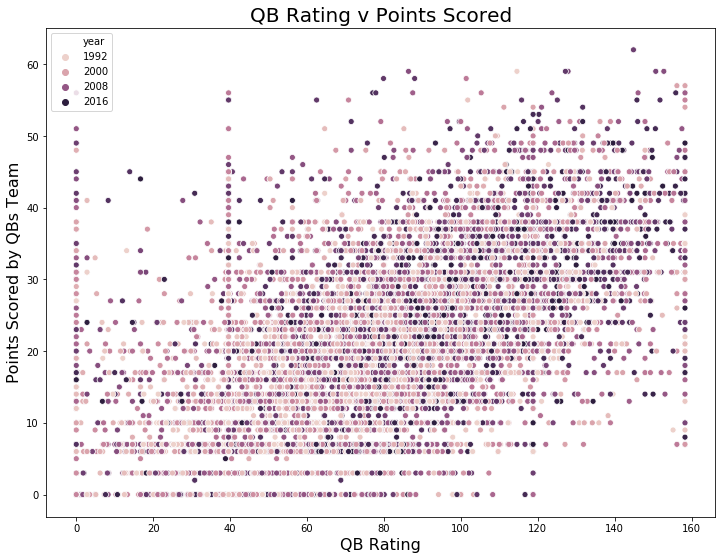

In [365]:
#QB rating is supposed to quantify a quarterbacks complete impact on a game. This stat also has the highest correlation to game points, so we'll start here

plt.figure(figsize=(12,9))

scatter = sns.scatterplot(x = QB['rate'], y = QB['game_points'], hue = QB['year'])

plt.title("QB Rating v Points Scored", fontdict={'fontsize': 20})
plt.xlabel("QB Rating", fontdict={'fontsize': 16})
plt.ylabel("Points Scored by QBs Team", fontdict={'fontsize': 16})

print(scatter)

#The relationship looks messy. Lets test it out.

#Correlation Between Qb Rating and Points
lin = LinearRegression()
X_data = QB[['rate']]
Y_data = QB['game_points']
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=3) # how to split the data using an sklearn function
lin.fit(x_train, y_train)
print("Coefficients:")
print(lin.coef_)
print("Intercept:")
print(lin.intercept_)
print("R^2:")
print(r2_score(lin.predict(x_train), y_train))

#With an R^2 of -1.812 QB Rating does an incredibly poor job of predicting points scored!

AxesSubplot(0.125,0.125;0.775x0.755)
Coefficients:
[4.85180928]
Intercept:
15.986517332119941
R^2:
-1.88224111056909


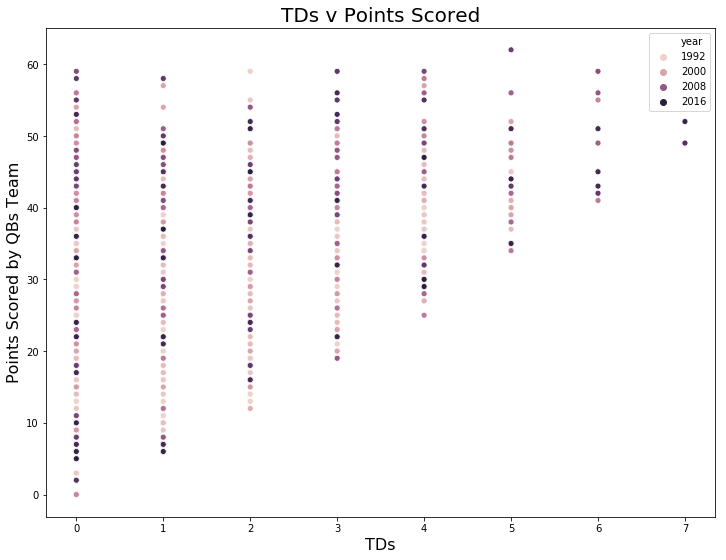

In [405]:
#Lets try Touchdowns

plt.figure(figsize=(12,9))

scatter = sns.scatterplot(x = QB['td'], y = QB['game_points'], hue = QB['year'])

plt.title("TDs v Points Scored", fontdict={'fontsize': 20})
plt.xlabel("TDs", fontdict={'fontsize': 16})
plt.ylabel("Points Scored by QBs Team", fontdict={'fontsize': 16})

print(scatter)


lin = LinearRegression()
X_data = QB[['td']]
Y_data = QB['game_points']
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=3) # how to split the data using an sklearn function
lin.fit(x_train, y_train)
print("Coefficients:")
print(lin.coef_)
print("Intercept:")
print(lin.intercept_)
print("R^2:")
print(r2_score(lin.predict(x_train), y_train))

#The relationshiup apperas to be cleaner, but the r^2 score is even worse!

In [397]:
#We clearly need to utilize more of the data we have. Lets try a "brute force" regression with all of the explanatory variables (outside of QB name)
X_data = QB.drop(["qb", "game_points"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=3) # how to split the data using an sklearn function
lin.fit(x_train, y_train)
print("Coefficients:")
print(lin.coef_)
print("Intercept:")
print(lin.intercept_)
print("R^2:")
print(r2_score(lin.predict(x_train), y_train))


#Brute force approach is better, but still results in negative R^2

Coefficients:
[-0.36263753 -0.07215487  0.05276154  0.04212353  3.91897601 -1.08288015
 -0.04599284 -0.64257229 -0.07039278  0.02245476  0.04344931 -0.91544991
  0.91544991  0.00904823]
Intercept:
-67.23704759875278
R^2:
-0.30578797165782845


In [398]:
#Predicting Points based on QB performance alone is clearly quite difficult. Lets try some Machine Learning methods
dtr = tree.DecisionTreeRegressor(max_depth=10, min_samples_leaf=3)
dtr.fit(x_train, y_train)
dTreePrediction = dtr.predict(x_test)

print("R^2:")
print(r2_score(dTreePrediction, y_test))


#A little better, but R^2 still negative!


R^2:
-0.20958339787356728


In [399]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rForestPrediction = rfr.predict(x_test)

print("R^2:")
print(r2_score(rForestPrediction, y_test))


#No gains!


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R^2:
-0.2549698261101261


In [ ]:
#Takeaway: Although the Quarterback is the most important player on the field, football still remains a team sport. 
#A team's offensive production cannot be predicted by a Quarterback's performance alone/